In [1]:
import os
import numpy as np

from neuron import rxd
from neuron import h

from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly

import sys
sys.path.insert(1, "../utils/")
import Stimuli, Pyr

In [2]:
stim_locs_file = '../data/morpho/segment_arrays/segment_array_0.3Hz_ID11.npy'
print(stim_locs_file)

stim_params = Stimuli.ExperimentalStimParams()
stim_scaffold = stim_params.stim_scaffold['pyr']
stim_locs = np.load(stim_locs_file)

stimuli_sets = [
    Stimuli.MorphoStimuli(
        f'stimset',
        stim_scaffold['stim_type_array'],
        stim_locs, stim_scaffold,
        1000
    ) for i in range(30)]

../data/morpho/segment_arrays/segment_array_0.3Hz_ID11.npy


In [3]:
data_dir = '../data/morpho/reconstruct_mccleary/'

def get_simulation_pairs(data_dir):
    files = os.listdir(data_dir)
    seglocIDs = list(set([file.split('_')[2] for file in files]))
    reconstruct_pairs = []
    for file in files:
        if 'origin' in file:
            pairfile = 'reconstruct'+file.strip('origin')
            if pairfile in files:
                reconstruct_pairs.append((file, pairfile))
    return reconstruct_pairs

reconstruct_pairs = get_simulation_pairs(data_dir)
reconstruct_pairs

[('origin_v_ID55_3.npy', 'reconstruct_v_ID55_3.npy'),
 ('origin_v_ID99_4.npy', 'reconstruct_v_ID99_4.npy'),
 ('origin_v_ID36_1.npy', 'reconstruct_v_ID36_1.npy'),
 ('origin_v_ID69_3.npy', 'reconstruct_v_ID69_3.npy'),
 ('origin_v_ID19_3.npy', 'reconstruct_v_ID19_3.npy'),
 ('origin_v_ID21_5.npy', 'reconstruct_v_ID21_5.npy'),
 ('origin_v_ID69_1.npy', 'reconstruct_v_ID69_1.npy'),
 ('origin_v_ID25_0.npy', 'reconstruct_v_ID25_0.npy'),
 ('origin_v_ID22_2.npy', 'reconstruct_v_ID22_2.npy'),
 ('origin_v_ID90_3.npy', 'reconstruct_v_ID90_3.npy'),
 ('origin_v_ID22_3.npy', 'reconstruct_v_ID22_3.npy'),
 ('origin_v_ID87_0.npy', 'reconstruct_v_ID87_0.npy'),
 ('origin_v_ID55_0.npy', 'reconstruct_v_ID55_0.npy'),
 ('origin_v_ID71_3.npy', 'reconstruct_v_ID71_3.npy'),
 ('origin_v_ID55_2.npy', 'reconstruct_v_ID55_2.npy'),
 ('origin_v_ID22_1.npy', 'reconstruct_v_ID22_1.npy'),
 ('origin_v_ID48_3.npy', 'reconstruct_v_ID48_3.npy'),
 ('origin_v_ID2_0.npy', 'reconstruct_v_ID2_0.npy'),
 ('origin_v_ID70_5.npy', 'reco

In [4]:
_t = np.arange(0,200.025, .025)

number of simulations: 50
morphology section: 974
time (.025ms): 8001


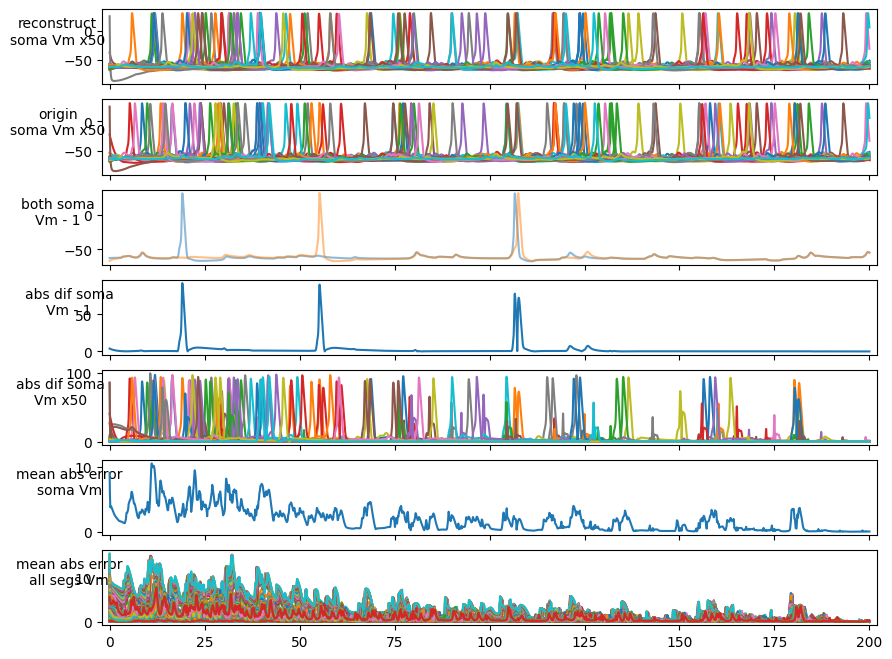

In [5]:
reconstruct_file, origin_file = reconstruct_pairs[0]

reconstruct_vs = np.load(f'{data_dir}{reconstruct_file}')
origin_vs = np.load(f'{data_dir}{origin_file}')

print(f'number of simulations: {reconstruct_vs.shape[0]}')
print(f'morphology section: {reconstruct_vs.shape[1]}')
print(f'time (.025ms): {reconstruct_vs.shape[2]}')

fig, axes = plt.subplots(7,1, figsize=(10,8), sharex=True)
for i in range(50):
    axes[0].plot(_t, reconstruct_vs[i,0,:])
    axes[1].plot(_t, origin_vs[i,0,:])
    
ind = 1
axes[2].plot(_t, reconstruct_vs[ind,0,:], alpha=0.5)
axes[2].plot(_t, origin_vs[ind,0,:], alpha=0.5)

vs_dif = np.abs(origin_vs - reconstruct_vs)

axes[3].plot(_t, vs_dif[ind,0,:])

for i in range(50):
    axes[4].plot(_t, vs_dif[i,0,:])

vs_mae = np.mean(vs_dif, axis=0)
axes[5].plot(_t, vs_mae[ind,:])

for i in range(vs_mae.shape[0]):
    axes[6].plot(_t, vs_mae[i,:])
    
axes[-1].set_xlim(-2, 202)
    
axes[0].set_ylabel('reconstruct\nsoma Vm x50',  rotation=0)
axes[1].set_ylabel('origin\nsoma Vm x50', rotation=0)
axes[2].set_ylabel(f'both soma\nVm - {ind}', rotation=0)
axes[3].set_ylabel(f'abs dif soma\nVm - {ind}', rotation=0)
axes[4].set_ylabel(f'abs dif soma\nVm x50', rotation=0)
axes[5].set_ylabel(f'mean abs error\nsoma Vm', rotation=0)
axes[6].set_ylabel(f'mean abs error\nall segs Vm', rotation=0)

plt.show()

In [ ]:
reconstruct_file, origin_file = reconstruct_pairs[1]

reconstruct_vs = np.load(f'{data_dir}{reconstruct_file}')
origin_vs = np.load(f'{data_dir}{origin_file}')

vs_dif = np.abs(origin_vs - reconstruct_vs)
vs_mae = np.mean(vs_dif, axis=0)

print(f'number of simulations: {reconstruct_vs.shape[0]}')
print(f'morphology section: {reconstruct_vs.shape[1]}')
print(f'time (.025ms): {reconstruct_vs.shape[2]}')

fig, axes = plt.subplots(7,1, figsize=(10,8), sharex=True)
for i in range(50):
    axes[0].plot(_t, reconstruct_vs[i,0,:])
    axes[1].plot(_t, origin_vs[i,0,:])
    
ind = 1
axes[2].plot(_t, reconstruct_vs[ind,0,:], alpha=0.5)
axes[2].plot(_t, origin_vs[ind,0,:], alpha=0.5)

axes[3].plot(_t, vs_dif[ind,0,:])

for i in range(50):
    axes[4].plot(_t, vs_dif[i,0,:])


axes[5].plot(_t, vs_mae[ind,:])

for i in range(vs_mae.shape[0]):
    axes[6].plot(_t, vs_mae[i,:])
    
axes[-1].set_xlim(-2, 202)
    
axes[0].set_ylabel('reconstruct\nsoma Vm x50',  rotation=0)
axes[1].set_ylabel('origin\nsoma Vm x50', rotation=0)
axes[2].set_ylabel(f'both soma\nVm - {ind}', rotation=0)
axes[3].set_ylabel(f'abs dif soma\nVm - {ind}', rotation=0)
axes[4].set_ylabel(f'abs dif soma\nVm x50', rotation=0)
axes[5].set_ylabel(f'mean abs error\nsoma Vm', rotation=0)
axes[6].set_ylabel(f'mean abs error\nall segs Vm', rotation=0)

plt.show()

In [ ]:
def calc_sim_pair_mae(origin_file, reconstruct_file, data_dir):
    reconstruct_vs = np.load(f'{data_dir}{reconstruct_file}')
    origin_vs = np.load(f'{data_dir}{origin_file}')
    
    vs_dif = np.abs(origin_vs - reconstruct_vs)
    vs_mae = np.mean(vs_dif, axis=0)
    
    return vs_mae

In [ ]:
data_dir = '../data/morpho/reconstruct/'
data_dirID = 'home'
reconstruct_pairs = get_simulation_pairs(data_dir)

i = 1
for origin_file, reconstruct_file in reconstruct_pairs:
    print(f'{i}/{len(reconstruct_pairs)}')
    i+=1
    seglocID = origin_file.split('_')[2]
    ind = origin_file.split('_')[3].strip('.npy')
    mae = calc_sim_pair_mae(origin_file, reconstruct_file, data_dir)
    vs_means[seglocID+'_'+ind+'_'+data_dirID] = mae

In [ ]:
vs_means_agg = np.array(list(vs_means.values()))
vs_means_agg = np.mean(vs_means_agg, axis=0)

In [ ]:
all_means = np.array(list(vs_means.values()))

In [ ]:
all_means[:,:,25*40].flatten().shape

In [ ]:
plt.hist(all_means[:,:,:].flatten(), bins=100)

In [ ]:
pyr = Pyr.Pyr()
section_locations = []
for seg in pyr.all_segs:
    for sec in seg:
        section_locations.append(seg.hname().split('.')[1].split('[')[0])

In [ ]:
section_location2color = {
    'soma':'orange',
    'axon':'green',
    'apic':'purple',
    'basal':'red'
}

vs_means_by_sec = {
    'soma':[],
    'axon':[],
    'apic':[],
    'basal':[]
}
for i, section_location in enumerate(section_locations):
    #plt.plot(_t, vs_means_agg[i,:], color=section_location2color[section_location], alpha=0.5)
    vs_means_by_sec[section_location].append(vs_means_agg[i,:])

fig, axes = plt.subplots(1, figsize=(6.5, 3))    

vs_means_by_sec['soma'] = np.mean(np.array(vs_means_by_sec['soma']), axis=0)
vs_means_by_sec['axon'] = np.mean(np.array(vs_means_by_sec['axon']), axis=0)
vs_means_by_sec['apic'] = np.mean(np.array(vs_means_by_sec['apic']), axis=0)
vs_means_by_sec['basal'] = np.mean(np.array(vs_means_by_sec['basal']), axis=0)

axes.plot(_t, vs_means_by_sec['soma'], color=section_location2color['soma'])
axes.plot(_t, vs_means_by_sec['axon'], color=section_location2color['axon'])
axes.plot(_t, vs_means_by_sec['apic'], color=section_location2color['apic'])
axes.plot(_t, vs_means_by_sec['basal'], color=section_location2color['basal'])

# aesthetics
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.set_xlim(0,200)
axes.set_ylim(0, 6)

plt.legend(['soma','axon','apical dendrites','basal dendrites'])
axes.set_ylabel('mean absolute Vm\nreconstruct error (mV)')
axes.set_xlabel('time (ms)')


plt.show()

## 3D visualization

In [ ]:
pyr = Pyr.Pyr()
cyt = rxd.Region(pyr.all_segs)
error = rxd.Parameter(cyt)
vals = []

In [ ]:
i = 0
for sec in pyr.all_segs:
    for seg in sec:
        # mean absolute error over all time
        val = np.mean(vs_means_agg[i])
        
        error.nodes(seg).value = val
        vals.append(val)
        i+=1

In [ ]:
ps = h.PlotShape(False)
ps.variable(error)
ps.scale(0, max(vals))

ps2 = ps.plot(plotly, cmap=cm.cool)

ps2.show()

In [ ]:


fig, ax = plt.subplots(1, 1)

fraction = 1  # .05

norm = mpl.colors.Normalize(vmin=0, vmax=1)
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap='cool'),
            ax=ax, extend='both')

ax.axis('off')
plt.show()